In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("Cian.csv", sep = ";")
df = df[["author_type", "url", "floor", "floors_count", "rooms_count",
         "total_meters", "price_per_month", "district", "underground"]]
df

,author_type,url,floor,floors_count,rooms_count,total_meters,price_per_month,district,underground
0,real_estate_agent,https://www.cian.ru/rent/flat/300935887/,3,6,4,140.0,500000,Пресненский,Маяковская
1,official_representative,https://www.cian.ru/rent/flat/278216280/,7,12,2,90.0,1000000,Тверской,Охотный ряд
2,real_estate_agent,https://www.cian.ru/rent/flat/301508796/,60,78,3,120.0,360000,Пресненский,Деловой центр
3,real_estate_agent,https://www.cian.ru/rent/flat/299073557/,5,12,3,115.0,300000,Тверской,Маяковская
4,real_estate_agent,https://www.cian.ru/rent/flat/299746207/,11,12,3,117.2,350000,Хамовники,Смоленская
...,...,...,...,...,...,...,...,...,...
1444,unknown,https://www.cian.ru/rent/flat/302180991/,3,14,1,43.0,40000,Северное Измайлово,Щёлковская
1445,realtor,https://www.cian.ru/rent/flat/302247905/,3,9,1,33.0,50000,Сокольники,Сокольники
1446,real_estate_agent,https://www.cian.ru/rent/flat/301969676/,3,9,1,36.0,33000,Нагатино-Садовники,Коломенская
1447,real_estate_agent,https://www.cian.ru/rent/flat/302201470/,6,22,1,36.0,33000,Перово,Перово


# Работа с данными

In [ ]:
#df = df[df['district'].notna()]

In [ ]:
# столбец будет в тысячах
df[["price_per_month"]] = df[["price_per_month"]]/1000

In [ ]:
# функция для создания ранговой шкалы
# ранги: до 50 тыс - эконом, до 100 тыс - что-то среднее,
# до 200 тыс - что-то хорошее, больше 200 тыс - условно премиум
def price(n):
    if n <= 50:
        return 1
    elif n <= 100:
        return 2
    elif n <= 200:
        return 3
    else:
        return 4

def price_name(x):
    if x == 1:
        return 'Эконом'
    if x == 2:
        return 'Комфорт'
    if x == 3:
        return 'Бизнес'
    if x == 4:
        return 'Премиум'

In [ ]:
# вставляю шкалу
df.insert(7, "price_range", df['price_per_month'].apply(price))

df.insert(8, "price_name", df['price_range'].apply(price_name))

#df.insert(10, "territory", df['district'].apply(territory))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   author_type      1449 non-null   object 
 1   url              1449 non-null   object 
 2   floor            1449 non-null   int64  
 3   floors_count     1449 non-null   int64  
 4   rooms_count      1449 non-null   int64  
 5   total_meters     1449 non-null   float64
 6   price_per_month  1449 non-null   float64
 7   price_range      1449 non-null   int64  
 8   price_name       1449 non-null   object 
 9   district         1351 non-null   object 
 10  underground      1446 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 124.6+ KB


In [ ]:
df.head()

,author_type,url,floor,floors_count,rooms_count,total_meters,price_per_month,price_range,price_name,district,underground
0,real_estate_agent,https://www.cian.ru/rent/flat/300935887/,3,6,4,140.0,500.0,4,Премиум,Пресненский,Маяковская
1,official_representative,https://www.cian.ru/rent/flat/278216280/,7,12,2,90.0,1000.0,4,Премиум,Тверской,Охотный ряд
2,real_estate_agent,https://www.cian.ru/rent/flat/301508796/,60,78,3,120.0,360.0,4,Премиум,Пресненский,Деловой центр
3,real_estate_agent,https://www.cian.ru/rent/flat/299073557/,5,12,3,115.0,300.0,4,Премиум,Тверской,Маяковская
4,real_estate_agent,https://www.cian.ru/rent/flat/299746207/,11,12,3,117.2,350.0,4,Премиум,Хамовники,Смоленская


# Поиск самой типичной квартиры

In [ ]:
# решила начать поиск с колва комнат
print('mode     ', df['rooms_count'].mode()[0])
# мода 2, оставляю только двушки
df_2rooms = df[df['rooms_count'] == 2]


mode      2


In [ ]:
print('mode     ', df_2rooms['price_per_month'].mode()[0])
print(df_2rooms['price_per_month'].describe())
# большая разница между модой, медианой и средним арифметическим, есть квартира за 1.800.000
# уберу выбросы. внизу получилось, что выбросы > 400 тыс

mode      70.0
count     479.00000
mean      155.22919
std       173.90849
min        34.00000
25%        65.00000
50%        95.00000
75%       200.00000
max      1800.00000
Name: price_per_month, dtype: float64


In [ ]:
df_2rooms = df_2rooms[df_2rooms['price_per_month'] <= 400]

In [ ]:
df_2rooms['price_name'].value_counts().sort_values()

price_name
Эконом      49
Бизнес      97
Премиум     98
Комфорт    220
Name: count, dtype: int64

In [ ]:
df_2rooms = df_2rooms[df_2rooms['price_name'] == "Комфорт"]

In [ ]:
print('mode     ', df_2rooms['price_per_month'].mode()[0])
print(df_2rooms['price_per_month'].describe())

mode      70.0
count    220.000000
mean      75.040900
std       14.741217
min       50.900000
25%       61.275000
50%       75.000000
75%       88.100000
max      100.000000
Name: price_per_month, dtype: float64


In [ ]:
print('mode     ', df_2rooms['total_meters'].mode()[0])
print(df_2rooms['total_meters'].describe())
# выбросов всего 2, они 81-85 метров, убирать не буду, незначительны

mode      50.0
count    220.000000
mean      52.641818
std        9.553167
min       32.000000
25%       45.000000
50%       51.100000
75%       59.775000
max       85.000000
Name: total_meters, dtype: float64


In [ ]:
df_2rooms = df_2rooms[df_2rooms['price_per_month'] <= 75.0]
df_2rooms = df_2rooms[df_2rooms['price_per_month'] >= 70.0]

In [ ]:
print('mode     ', df_2rooms['total_meters'].mode()[0])
print(df_2rooms['total_meters'].describe())

mode      40.0
count    48.000000
mean     50.639583
std      10.520148
min      35.000000
25%      43.750000
50%      50.000000
75%      57.250000
max      85.000000
Name: total_meters, dtype: float64


In [ ]:
df_2rooms = df_2rooms[df_2rooms['total_meters'] >= 50.0]
df_2rooms = df_2rooms[df_2rooms['total_meters'] <= 51.0]

In [ ]:
df_2rooms

,author_type,url,floor,floors_count,rooms_count,total_meters,price_per_month,price_range,price_name,district,underground
125,real_estate_agent,https://www.cian.ru/rent/flat/302069639/,2,5,2,50.0,75.0,2,Комфорт,Раменки,Ломоносовский проспект
540,real_estate_agent,https://www.cian.ru/rent/flat/302253840/,5,17,2,51.0,70.0,2,Комфорт,Солнцево,Солнцево
566,real_estate_agent,https://www.cian.ru/rent/flat/302339389/,3,12,2,50.0,70.0,2,Комфорт,Басманный,Лефортово
776,real_estate_agent,https://www.cian.ru/rent/flat/302350661/,8,17,2,50.0,70.0,2,Комфорт,NaN,Филатов Луг
1205,real_estate_agent,https://www.cian.ru/rent/flat/302346401/,3,9,2,50.0,70.0,2,Комфорт,Мещанский,Проспект Мира
1215,realtor,https://www.cian.ru/rent/flat/301801594/,20,33,2,50.0,70.0,2,Комфорт,Нижегородский,Нижегородская


In [ ]:
df_2rooms['underground'].value_counts().sort_values()

underground
Ломоносовский проспект    1
Солнцево                  1
Лефортово                 1
Филатов Луг               1
Проспект Мира             1
Нижегородская             1
Name: count, dtype: int64

# Другие описательные статистики

In [ ]:
df.groupby('district')['price_per_month'].mean().sort_values()
# можно взять

district
Северный              34.000000
Бирюлево Западное     35.000000
Молжаниновский        36.000000
Вешняки               38.500000
Савёлки               39.000000
                        ...    
Замоскворечье        382.056857
Тверской             433.606045
Якиманка             478.333333
Арбат                525.000000
Хамовники            662.936191
Name: price_per_month, Length: 118, dtype: float64

In [ ]:
df.groupby('district')['price_per_month'].apply(pd.Series.mode)

district        
Академический  0     40.0
               1     55.0
               2     65.0
               3     91.4
               4    100.0
                    ...  
Ясенево        2     45.0
               3     70.0
               4     95.0
               5    145.0
               6    200.0
Name: price_per_month, Length: 338, dtype: float64

In [ ]:
#df.groupby('territory')['price_per_month'].apply(pd.Series.mode)

In [ ]:
df.groupby('price_name')['price_per_month'].mean().sort_values()

price_name
Эконом      42.781773
Комфорт     73.106247
Бизнес     150.420628
Премиум    460.088622
Name: price_per_month, dtype: float64

In [ ]:
df.groupby('price_name')['total_meters'].mean().sort_values()

price_name
Эконом      37.494052
Комфорт     48.823991
Бизнес      76.264828
Премиум    135.114376
Name: total_meters, dtype: float64

In [ ]:
df.groupby('price_name')['total_meters'].agg(pd.Series.mode)

price_name
Бизнес      80.0
Комфорт     40.0
Премиум    150.0
Эконом      40.0
Name: total_meters, dtype: float64

In [ ]:
df.groupby('price_name')['total_meters'].agg(pd.Series.median)

price_name
Бизнес      71.0
Комфорт     47.0
Премиум    130.0
Эконом      38.0
Name: total_meters, dtype: float64

In [ ]:
df.groupby('price_name')['rooms_count'].agg(pd.Series.mode)

price_name
Бизнес     3
Комфорт    2
Премиум    3
Эконом     1
Name: rooms_count, dtype: int64

In [ ]:
df.groupby('price_range')['rooms_count'].value_counts()

price_range  rooms_count
1            1              218
             2               49
             3                2
2            2              220
             1              167
             3               59
3            3              118
             2               97
             4               24
             1               22
4            3              182
             4              176
             2              113
             1                2
Name: count, dtype: int64

<ipython-input-87-e52dfd3c0f16>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax_main.scatter('rooms_count', 'price_per_month', alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)


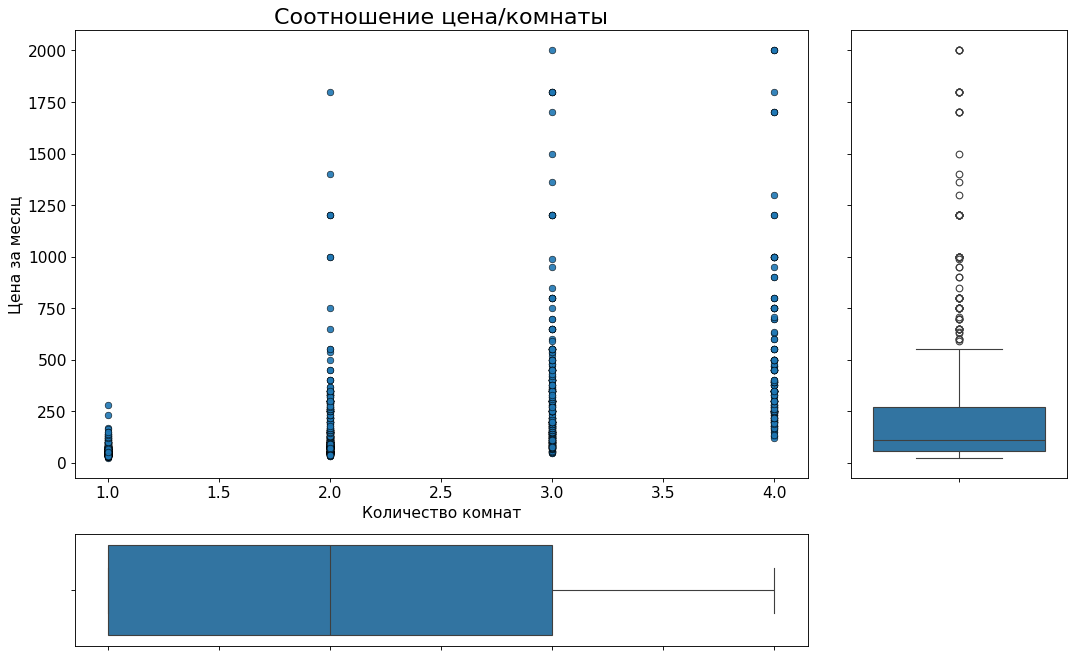

In [ ]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('rooms_count', 'price_per_month', alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.price_per_month, ax=ax_right, orient="v")
sns.boxplot(df.rooms_count, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Соотношение цена/комнаты', xlabel='Количество комнат', ylabel='Цена за месяц')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.savefig('/content/plot_1.png')
plt.show()


<ipython-input-88-97aaf18bd63d>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax_main.scatter('rooms_count', 'price_per_month', alpha=.9, data=df_new, cmap="Set1", edgecolors='black', linewidths=.5)


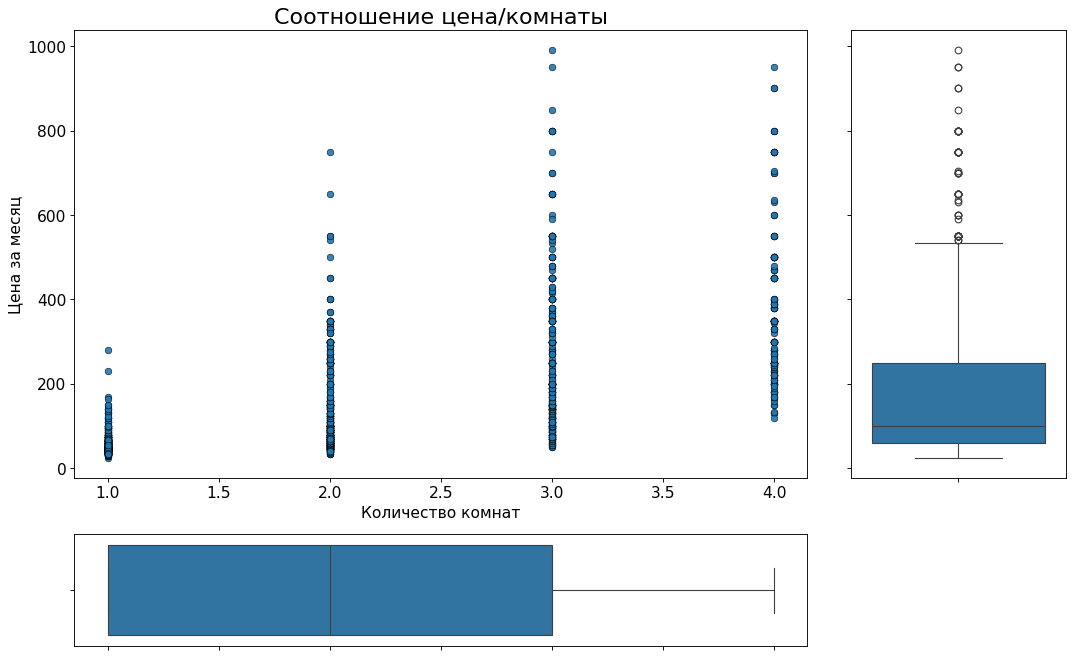

In [ ]:
df_new = df[df['price_per_month'] < 1000]
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('rooms_count', 'price_per_month', alpha=.9, data=df_new, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df_new.price_per_month, ax=ax_right, orient="v")
sns.boxplot(df_new.rooms_count, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Соотношение цена/комнаты', xlabel='Количество комнат', ylabel='Цена за месяц')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.savefig('/content/plot_2.png')
plt.show()

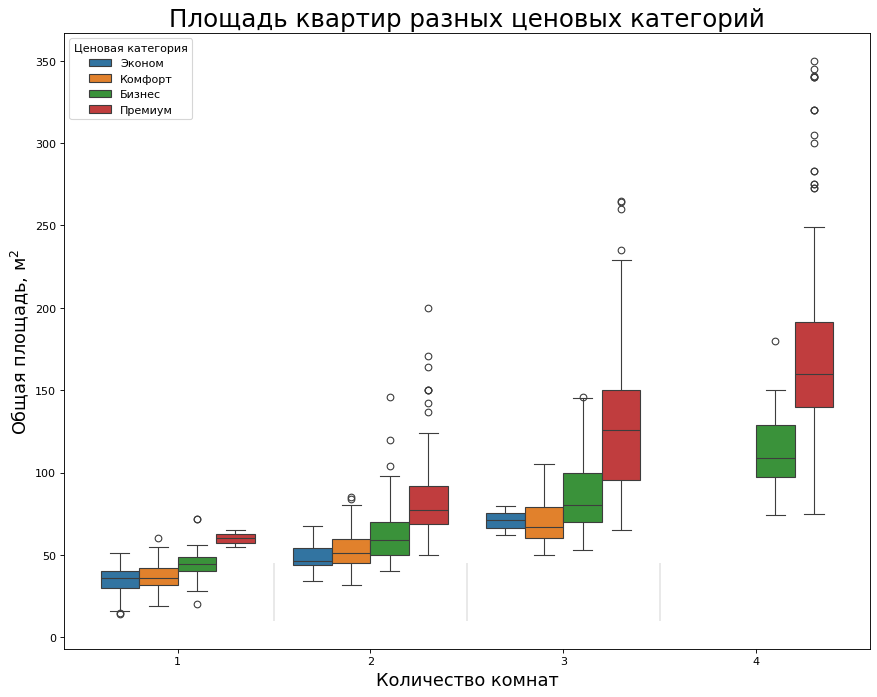

In [ ]:
plt.figure(figsize=(13,10), dpi= 80)
hue_order = ['Эконом', "Комфорт", "Бизнес", "Премиум"]
sns.boxplot(x='rooms_count', y='total_meters', data=df, hue='price_name', hue_order=hue_order)
#sns.stripplot(x='rooms_count', y='total_meters', data=df, color='black', size=3, jitter=1)

for i in range(len(df['rooms_count'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Площадь квартир разных ценовых категорий', fontsize=22)
plt.legend(title='Ценовая категория')
plt.xlabel("Количество комнат", fontsize=16)
plt.ylabel("Общая площадь, м$^2$", fontsize=16)
plt.savefig('/content/plot_3.png')
plt.show()

# Модели

In [ ]:
df_num = df.select_dtypes(include=np.number)

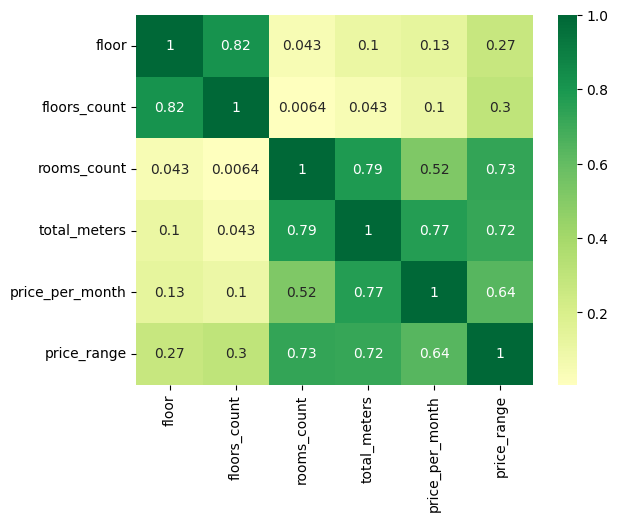

In [ ]:
sns.heatmap(df_num.corr(), annot=True, center=0, cmap='RdYlGn');
# имеет смысл предсказвать цену или хотя бы ценовую категорию по площади, числу комнат и району.
# площадь и комнаты перекоррелированы между собой, вместе их использовать нельзя
# районы попробую перевести в бинарную шкалу

In [ ]:
# перекодировка категориальной шкалы района в бинарную
df_one = df_num[['price_per_month', 'price_range', 'rooms_count', 'total_meters']]
df_two = pd.get_dummies(df['district'], dtype = int) ## потом попробовала посчитать по округам москвы, точность вышла меньше
df_new = pd.concat((df_one, df_two), axis=1)

In [ ]:
# список столбцов для х
col_names = df_two.keys().to_list()
col_names.append('total_meters')

In [ ]:
df_new.head()

,price_per_month,price_range,rooms_count,total_meters,Академический,Алексеевский,Алтуфьевский,Арбат,Аэропорт,Бабушкинский,...,Чертаново Центральное,Чертаново Южное,Щукино,Южное Бутово,Южное Медведково,Южное Тушино,Южнопортовый,Якиманка,Ярославский,Ясенево
0,500.0,4,4,140.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000.0,4,2,90.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,360.0,4,3,120.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300.0,4,3,115.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,350.0,4,3,117.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Множественная линейная регрессия

In [ ]:
x = df_new[col_names]
y = df_num['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 56)
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
df_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_reg

,Actual,Predicted
213,4,4.064041
486,2,1.874890
1208,2,1.980671
73,4,4.411090
18,4,3.444960
...,...,...
360,2,2.206547
960,4,3.799587
1118,1,1.478535
963,4,4.430486


In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
## неплохой результат

R squared: 78.66
Mean Absolute Error: 0.44802303246243613
Mean Square Error: 0.3155460786950063
Root Mean Square Error: 0.5617348829252161


### KNN ближайших соседей

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x = df_new[col_names]
y = df_new['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, weights = 'distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy_score(y_test, y_pred)

0.6574712643678161

###Дерево решений -- классификация

####список округов москвы

In [ ]:
ЦАО = ["Арбат", 'Басманный', 'Замоскворечье', "Красносельский", "Мещанский",
             "Пресненский", "Таганский", "Тверской", "Хамовники", "Якиманка"]
ЦАО = [item.lower() for item in ЦАО]
САО = ["Аэропорт", "Беговой",
       "Бескудниковский", "Войковский",
    "Восточное Дегунино",
    "Головинский",
    "Дмитровский",
    "Западное Дегунино",
    "Коптево",
    "Левобережный",
    "Молжаниновский",
    "Савеловский",
    "Сокол",
    "Тимирязевский",
    "Ховрино",
    "Хорошевский"]
САО = [item.lower() for item in САО]
СВАО = ["Алексеевский",
    "Алтуфьевский",
    "Бабушкинский",
    "Бибирево",
    "Бутырский",
    "Лианозово",
    "Лосиноостровский",
    "Марфино",
    "Марьина Роща",
    "Останкинский",
    "Отрадное",
    "Ростокино",
    "Свиблово",
    "Северный",
    "Северное Медведково",
    "Южное Медведково",
    "Ярославский"]
СВАО = [item.lower() for item in СВАО]
ВАО = ["Богородское",
    "Вешняки",
    "Восточный",
    "Восточное Измайлово",
    "Гольяново",
    "Ивановское",
    "Измайлово",
    "Косино-Ухтомский",
    "Метрогородок",
    "Новогиреево",
    "Новокосино",
    "Перово",
    "Преображенское",
    "Северное Измайлово",
    "Соколиная Гора",
    "Сокольники"]
ВАО = [item.lower() for item in ВАО]
ЮВАО = ["Выхино-Жулебино",
    "Капотня",
    "Кузьминки",
    "Лефортово",
    "Люблино",
    "Марьино",
    "Некрасовка",
    "Нижегородский",
    "Печатники",
    "Рязанский",
    "Текстильщики",
    "Южнопортовый"]
ЮВАО = [item.lower() for item in ЮВАО]
ЮАО = ["Бирюлево Восточное",
    "Бирюлево Западное",
    "Братеево",
    "Даниловский",
    "Донской",
    "Зябликово",
    "Москворечье-Сабурово",
    "Нагатино-Садовники",
    "Нагатинский Затон",
    "Нагорный",
    "Орехово-Борисово Северное",
    "Орехово-Борисово Южное",
    "Царицыно",
    "Чертаново Северное",
    "Чертаново Центральное",
    "Чертаново Южное"]
ЮАО = [item.lower() for item in ЮАО]
ЮЗАО = ["Академический",
    "Гагаринский",
    "Зюзино",
    "Коньково",
    "Котловка",
    "Ломоносовский",
    "Обручевский",
    "Северное Бутово",
    "Теплый Стан",
    "Черемушки",
    "Южное Бутово",
    "Ясенево"]
ЮЗАО = [item.lower() for item in ЮЗАО]
ЗАО = ["Внуково",
    "Дорогомилово",
    "Крылатское",
    "Кунцево",
    "Можайский",
    "Ново-Переделкино",
    "Очаково-Матвеевское",
    "Проспект Вернадского",
    "Раменки",
    "Солнцево",
    "Тропарево-Никулино",
    "Филевский парк",
    "Фили-Давыдково"]
ЗАО = [item.lower() for item in ЗАО]
СЗАО = ["Куркино",
    "Митино",
    "Покровское-Стрешнево",
    "Северное Тушино",
    "Строгино",
    "Хорошево-Мневники",
    "Щукино",
    "Южное Тушино"]
СЗАО = [item.lower() for item in СЗАО]
ЗелАО = ["Матушкино",
    "Савёлки",
    "Старое Крюково",
    "Силино",
    "Крюково"]
ЗелАО = [item.lower() for item in ЗелАО]

In [ ]:
moscow_list = [ЦАО, САО, СВАО, ВАО, ЮВАО, ЮАО, ЮЗАО, ЗАО, СЗАО, ЗелАО]
moscow_list_str = ["ЦАО", "САО", "СВАО", "ВАО", "ЮВАО", "ЮАО", "ЮЗАО", "ЗАО", "СЗАО", "ЗелАО"]

####обновление таблицы и дерево

In [ ]:
from sklearn import tree
import graphviz

In [ ]:
def territory(x):
    for i in range(len(moscow_list_str)):
      if str(x).lower() in moscow_list[i]:
        return moscow_list_str[i]

In [ ]:
# уберу все строки, где не указан район, чтобы везде можно было добавить округ
df = df[df['district'].notna()]
df.insert(10, "territory", df['district'].apply(territory))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1448
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   author_type      1351 non-null   object 
 1   url              1351 non-null   object 
 2   floor            1351 non-null   int64  
 3   floors_count     1351 non-null   int64  
 4   rooms_count      1351 non-null   int64  
 5   total_meters     1351 non-null   float64
 6   price_per_month  1351 non-null   float64
 7   price_range      1351 non-null   int64  
 8   price_name       1351 non-null   object 
 9   district         1351 non-null   object 
 10  territory        1351 non-null   object 
 11  underground      1348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 137.2+ KB


In [ ]:
df_one = df[['price_range', 'rooms_count', 'total_meters']]
df_two = pd.get_dummies(df['territory'], dtype = int)
df_tree = pd.concat((df_one, df_two), axis=1)
columns_names = ['rooms_count', 'total_meters']
columns_names.append(df_two.keys().to_list())

In [ ]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1448
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price_range   1351 non-null   int64  
 1   rooms_count   1351 non-null   int64  
 2   total_meters  1351 non-null   float64
 3   ВАО           1351 non-null   int64  
 4   ЗАО           1351 non-null   int64  
 5   ЗелАО         1351 non-null   int64  
 6   САО           1351 non-null   int64  
 7   СВАО          1351 non-null   int64  
 8   СЗАО          1351 non-null   int64  
 9   ЦАО           1351 non-null   int64  
 10  ЮАО           1351 non-null   int64  
 11  ЮВАО          1351 non-null   int64  
 12  ЮЗАО          1351 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 147.8 KB


In [ ]:
x = df_tree[['rooms_count', 'total_meters', 'ВАО', 'ЗАО', 'ЗелАО', 'САО', 'СВАО', 'СЗАО', 'ЦАО', 'ЮАО', 'ЮВАО', 'ЮЗАО']]
y = df_tree['price_range']
clf = tree.DecisionTreeClassifier(
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=7,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=7,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5)
                               # минимальное значение дельты impurity (примеси)
                               # min_impurity_decrease=0
clf = clf.fit(x, y)

In [ ]:
# подбор гиперпараметров
parameters = {'max_depth':range(2,10), 'criterion' : ['entropy', 'gini'], 'min_samples_split':range(2,10)}
grid = GridSearchCV(tree.DecisionTreeClassifier(), parameters)
grid.fit(x, y)
tree_model = grid.best_estimator_
print(grid.best_score_, grid.best_params_)

0.7039278392783928 {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}


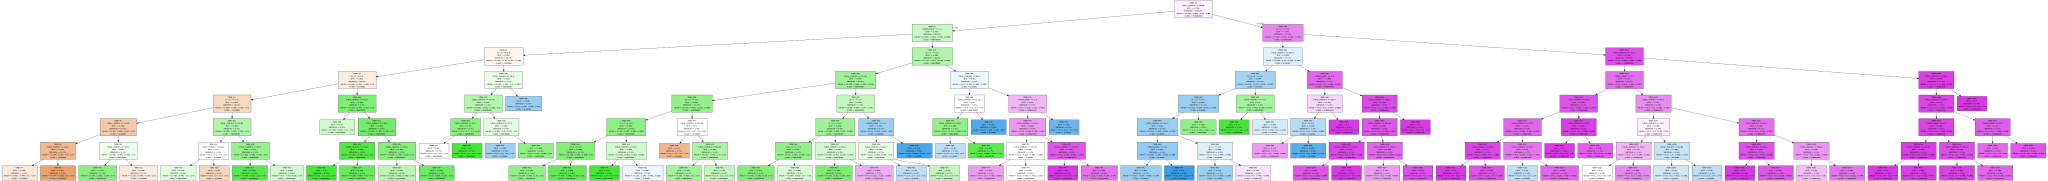

In [ ]:
dot_data = tree.export_graphviz(clf, out_file = None,
                      # задать названия столбцов
                      feature_names = df_tree.columns[1:],
                      # названия классов - если они у нас есть, если нет, ставим None
                      class_names = ["Эконом", "Комфорт", "Бизнес", "Премиум"],
                      # показывать названия полей у численных значений внутри узла
                      label='all',
                      # раскрашивать узлы в цвет преобладающего класса
                      filled=True,
                      # показывать примеси - зашумленность, загрязненность
                      impurity=True,
                      # показывать номера узлов
                      node_ids=True,
                      # Показывать доли каждого класса в узлах (а не количество)
                      proportion=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
pd.DataFrame({'feature': df_tree.columns[1:],
              'importance': clf.feature_importances_}).sort_values('importance', ascending=False)
# в основном влияет метраж и расположение в цао

,feature,importance
1,total_meters,0.661777
8,ЦАО,0.165135
0,rooms_count,0.089541
3,ЗАО,0.039721
5,САО,0.020164
2,ВАО,0.013948
11,ЮЗАО,0.007928
6,СВАО,0.001786
4,ЗелАО,0.000000
7,СЗАО,0.000000


In [ ]:
x = df_tree[df_tree.columns[1:]]
y = df_tree['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)
# stratify - способ поддерживать баланс классов в обучающей и тестовой выборке

# обучаем модель на тренировочных данных
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
confusion_matrix(y_pred, y_test)

array([[ 37,  22,   1,   0],
       [ 28,  82,  26,   1],
       [  0,  17,  32,  15],
       [  0,   1,  18, 126]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.57      0.59        65
           2       0.60      0.67      0.63       122
           3       0.50      0.42      0.45        77
           4       0.87      0.89      0.88       142

    accuracy                           0.68       406
   macro avg       0.65      0.64      0.64       406
weighted avg       0.68      0.68      0.68       406



In [ ]:
scores = cross_validate(clf,
                        x_train,
                        y_train,
                        scoring='accuracy',
                        cv=5,
                        return_estimator=True,
                        return_train_score=True)

scores_df = pd.DataFrame.from_dict(scores)
scores_df

,fit_time,score_time,estimator,test_score,train_score
0,0.007419,0.003232,"DecisionTreeClassifier(max_depth=7, min_sample...",0.677249,0.756614
1,0.006777,0.003006,"DecisionTreeClassifier(max_depth=7, min_sample...",0.624339,0.756614
2,0.006745,0.002708,"DecisionTreeClassifier(max_depth=7, min_sample...",0.687831,0.734127
3,0.006189,0.003109,"DecisionTreeClassifier(max_depth=7, min_sample...",0.666667,0.764550
4,0.004900,0.005039,"DecisionTreeClassifier(max_depth=7, min_sample...",0.597884,0.757937


# Выбросы по стоимости

In [ ]:
print(df_2rooms.describe()['price_per_month']['25%'])
print(df_2rooms.describe()['price_per_month']['75%'])
d = df_2rooms.describe()['price_per_month']['75%'] - df_2rooms.describe()['price_per_month']['25%']
print("d =", d)

70.0
70.0
d = 0.0


In [ ]:
# выбросы справа
r = df_2rooms.describe()['price_per_month']['75%'] + 1.5 * d
print("r =", r)
len(df[df['price_per_month'] > r])
# можно подробнее посмотреть на эти квартиры

r = 70.0


926

In [ ]:
print(df_2rooms['price_per_month'].max())
print(df_2rooms['price_per_month'].min())

75.0
70.0


In [ ]:
df.describe()['price_per_month']

count    1351.000000
mean      218.739368
std       265.671207
min        31.999000
25%        64.250000
50%       120.000000
75%       290.000000
max      2000.000000
Name: price_per_month, dtype: float64

# Выбросы по площади




In [ ]:
print(df_2rooms.describe()['total_meters']['25%'])
print(df_2rooms.describe()['total_meters']['75%'])
d = df_2rooms.describe()['total_meters']['75%'] - df_2rooms.describe()['total_meters']['25%']
print("d =", d)

50.0
50.0
d = 0.0


In [ ]:
# выбросы справа
r = df_2rooms.describe()['total_meters']['75%'] + 1.5 * d
print("r =", r)
len(df_2rooms[df_2rooms['total_meters'] > r])
# можно подробнее посмотреть на эти квартиры

r = 50.0


1

In [ ]:
print(df['total_meters'].max())
print(df['total_meters'].min())

350.0
14.0


In [ ]:
df.describe()['total_meters']

count    1351.000000
mean       82.394759
std        54.608389
min        14.000000
25%        43.400000
50%        64.000000
75%       107.500000
max       350.000000
Name: total_meters, dtype: float64